In [115]:
import pandas as pd 
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.kernel_ridge import KernelRidge
import math
from scipy.signal import argrelextrema

In [116]:
def findLocalExtrema(m):

    maxInd = argrelextrema(m, np.greater)[0]
    minInd = argrelextrema(m, np.less)[0]
    exmInd = np.sort(np.concatenate([maxInd,minInd]))
    indicator = np.zeros(len(exmInd)) # indicate whether the extremum is a max or a min
    
    for i in range(len(exmInd)):
        if exmInd[i] in maxInd:
            indicator[i] = 1
        elif exmInd[i] in minInd:
            indicator[i] = -1
           
    return exmInd,indicator


In [117]:
def checkHS(m,exmInd,indicator):

    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    for i in range(nexm-4):
        upper = (exmv[i] + exmv[i+4])/2
        lower = (exmv[i+1] + exmv[i+3])/2
        if (indicator[i] > 0) and (exmv[i+2]> exmv[i]) and (exmv[i+2]>exmv[i+4]) \
        and (abs((exmv[i] - upper)/upper) <= 0.015) and (abs((exmv[i+4] - upper)/upper) <= 0.015) \
        and (abs((exmv[i+1] - lower)/lower) <= 0.015) and (abs((exmv[i+3] - lower)/lower) <= 0.015):
            flag = True
            pid = exmInd[np.arange(i,i+5)] # this is the index in the exmInd 
            break

    return flag, pid
        
def checkIHS(m,exmInd,indicator):
   
    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    for i in range(nexm-4):
        upper = (exmv[i] + exmv[i+4])/2
        lower = (exmv[i+1] + exmv[i+3])/2
        if (indicator[i] < 0) and (exmv[i+2] < exmv[i]) and (exmv[i+2]<exmv[i+4]) \
        and (abs((exmv[i] - upper)/upper) <= 0.015) and (abs((exmv[i+4] - upper)/upper) <= 0.015) \
        and (abs((exmv[i+1] - lower)/lower) <= 0.015) and (abs((exmv[i+3] - lower)/lower) <= 0.015):
            flag = True
            pid = exmInd[np.arange(i,i+5)]
            break

    return flag, pid

In [118]:
def checkBTOP(m,exmInd,indicator):
    
    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    for i in range(nexm-4):
        if (indicator[i] > 0) and (exmv[i] < exmv[i+2]) and (exmv[i+2]<exmv[i+4]) and (exmv[i+1] > exmv[i+3]):
            flag = True
            pid = exmInd[np.arange(i,i+5)]
            break
       
    return flag, pid


def checkBBOT(m,exmInd,indicator):
 
    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    for i in range(nexm-4):
        if (indicator[i] < 0) and (exmv[i] > exmv[i+2]) and (exmv[i+2]>exmv[i+4]) and (exmv[i+1] < exmv[i+3]):
            flag = True
            pid = exmInd[np.arange(i,i+5)] # this is the index in the exmInd 
            break
       
    return flag, pid

In [119]:
def checkTTOP(m,exmInd,indicator):

    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    for i in range(nexm-4):
        if (indicator[i] > 0) and (exmv[i] > exmv[i+2]) and (exmv[i+2]>exmv[i+4]) and (exmv[i+1] < exmv[i+3]):
            flag = True
            pid = exmInd[np.arange(i,i+5)] # this is the index in the exmInd 
            break
    return flag, pid


def checkTBOT(m,exmInd,indicator):

    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    for i in range(nexm-4):
        if (indicator[i] < 0) and (exmv[i] < exmv[i+2]) and (exmv[i+2]<exmv[i+4]) and (exmv[i+1] > exmv[i+3]):
            flag = True
            pid = exmInd[np.arange(i,i+5)] # this is the index in the exmInd 
            break
       
    return flag, pid

In [120]:
def checkRTOP(m,exmInd,indicator):

    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    top = exmInd[indicator>0]
    bot = exmInd[indicator<0]
    avgtop = np.mean(top)
    avgbot = np.mean(bot)
    for i in range(nexm-4):
        if (indicator[i] > 0) and (all(top<avgtop*(1+0.075))) and (all(top>avgtop*(1-0.075)))\
        and (all(bot<avgbot*(1+0.075))) and (all(bot>avgbot*(1-0.075)))\
        and (min(top)>max(bot)):
            flag = True
            pid = exmInd[np.arange(i,i+5)] # this is the index in the exmInd 
            break
       
    return flag, pid


def checkRBOT(m,exmInd,indicator):

    flag = False
    pid = None
    nexm = len(exmInd)
    exmv = m[exmInd]
    top = exmInd[indicator>0]
    bot = exmInd[indicator<0]
    avgtop = np.mean(top)
    avgbot = np.mean(bot)
    for i in range(nexm-4):
        if (indicator[i] < 0) and (all(top<avgtop*(1+0.075))) and (all(top>avgtop*(1-0.075)))\
        and (all(bot<avgbot*(1+0.075))) and (all(bot>avgbot*(1-0.075)))\
        and (min(top)>max(bot)):
            flag = True
            pid = exmInd[np.arange(i,i+5)] # this is the index in the exmInd 
            break
       
    return flag, pid

In [121]:
def checkDTOP(m,exmInd,indicator):

    flag = False
    pid = None
    
    if len(exmInd)<=1:
        pass
    else:    
        exmv = m[exmInd]
        ea = max(exmv[1:])
        avge = (ea + exmv[0])/2
        ta = np.argmax(exmv[1:])+1
        ia = exmInd[ta]
        if (indicator[0]>0) and (ia>exmInd[0]+22) and (abs((exmv[0]-avge)/avge)<=0.015)and (abs((ea-avge)/avge)<=0.015):
            flag = True
            pid =  np.array([exmInd[0],ia]) # this is the index in the exmInd
    
    return flag, pid


def checkDBOT(m,exmInd,indicator):

    flag = False
    pid = None
    
    if len(exmInd)<=1:
        pass
    else:
        exmv = m[exmInd]
        ea = min(exmv[1:])
        avge = (ea + exmv[0])/2
        ta = np.argmin(exmv[1:])+1
        ia = exmInd[ta]
        if (indicator[0]<0) and(ia>exmInd[0]+22) and (abs((exmv[0]-avge)/avge)<=0.015)and (abs((ea-avge)/avge)<=0.015):
            flag = True
            pid =  np.array([exmInd[0],ia]) # this is the index in the exmInd   
    
    return flag, pid

In [122]:
def GuassianKernal(x,h):
    return stats.norm.pdf(x,loc=0,scale=h)

def KernelSmooth(x, signal, h, kernel):
    m = np.zeros(len(x))
    m_hat = np.zeros(len(x))
    for t in range(len(x)):
        this_x = x[t]
        k = kernel(this_x-x,h)
        g = np.mean(k)
        w = k/g
        m[t] = np.mean(w*signal)
        m_hat[t] = (np.sum(w*signal)-w[t]*signal[t])/len(x)
        cv = np.mean((signal-m_hat)**2)
    return m, m_hat, cv        

from scipy.optimize import minimize
def chooseH(x, signal, kernel):
    def objFunc(h):
        m,m_hat, cv = KernelSmooth(x, signal, h, kernel)
        return cv
    res = minimize(objFunc, 1, 
                   method='Nelder-Mead', tol=1e-6, 
                  bounds = (0, None)
                  )
    m_, m_hat_, cv_ = KernelSmooth(x, signal, res.x[0], kernel)
    return res.x[0], m_, m_hat_, cv_ 

In [123]:
sample_data = pd.read_csv(r"TYC.csv", index_col = 0)['PRC']
sample_data.index = range(len(sample_data))
x = np.arange(len(sample_data))
signal = sample_data.values
#h_min, _, _, _  = chooseH(x, signal, GuassianKernal)
h_min = 10
#m,m_hat,cv = KernelSmooth(x, signal, h_min * 0.15, GuassianKernal)
#plt.plot(m)
#plt.show()

pattern detected8[ 1 30]
[ 31.40319517  31.66864379]


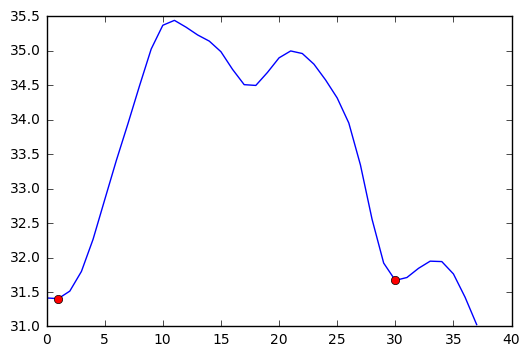

pattern detected157[ 4 33]
[ 46.7651287   45.73558224]


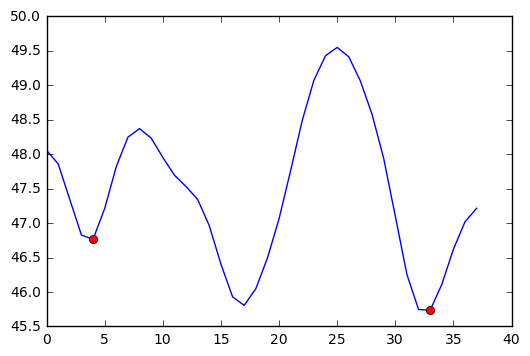

pattern detected458[ 1 24]
[ 24.19644944  24.41763629]


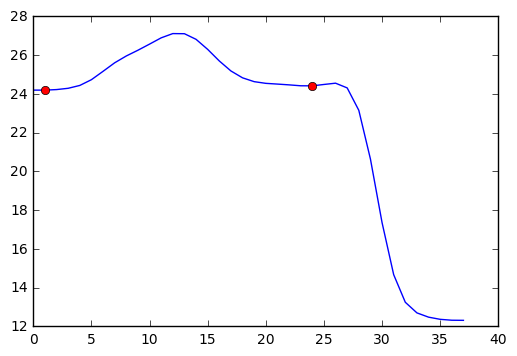

pattern detected700[ 4 32]
[ 16.64961328  16.79319217]


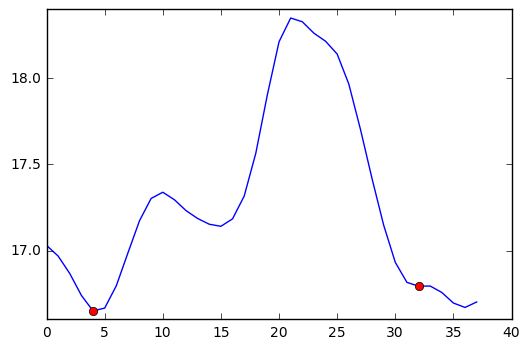

In [124]:
l = 35
d = 3
window = l+d
#nobs = len(x)
nobs = 1000

i = 0
while i+window<=nobs:

    sample_signal = signal[i:i+window]
    sample_x = x[i:i+window]
    sample_m,_,_ = KernelSmooth(sample_x, sample_signal, h_min*0.15, GuassianKernal)
    
    exmInd,indicator = findLocalExtrema(sample_m[0:l])
    
    flag,pid = checkDBOT(sample_m[0:l],exmInd,indicator)
    if flag:
        print 'pattern detected'+str(i)+str(pid)
        print sample_m[pid]
        plt.plot(sample_m)
        plt.plot(pid,sample_m[pid],'ro')
        plt.show()
        i = pid[0]+i
    else:
        i = i+1
            
            
    

In [ ]:
### old code

l = 35
d = 3
window = l+d
#nobs = len(x)
nobs = 1000
for i in range(nobs-window):

    sample_signal = signal[i:i+window]
    sample_x = x[i:i+window]
    sample_m,_,_ = KernelSmooth(sample_x, sample_signal, h_min*0.15, GuassianKernal)
    flag,pid = checkHS(sample_m[0:l])
    if flag:
        print 'pattern detected'+str(i)+str(pid)
        for pid_ in pid:
            print sample_m[pid_]
            plt.plot(sample_m)
            plt.plot(pid_,sample_m[pid_],'ro')
            plt.show()